<a href="https://colab.research.google.com/github/jagjeetkaur123/aws-codepipeline-s3-codedeploy-linux/blob/master/demosagemaker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('hello world')

hello world


In [ ]:
pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.5 MB/s 


In [ ]:
import shap
x,y = shap.datasets.adult()
x_display, y_display  = shap.datasets.adult(display= True)
feature_names = list(x.columns)
feature_names

['Age',
 'Workclass',
 'Education-Num',
 'Marital Status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital Gain',
 'Capital Loss',
 'Hours per week',
 'Country']

In [ ]:
display(x.describe())

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581646,3.868892,10.080679,2.611836,6.572740,2.494518,3.665858,0.669205,1077.648804,87.303833,40.437454,36.718866
std,13.640432,1.455960,2.572720,1.506222,4.228857,1.758232,0.848806,0.470506,7385.291992,402.960205,12.347429,7.823782
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,4.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,37.000000,4.000000,10.000000,2.000000,7.000000,3.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,48.000000,4.000000,12.000000,4.000000,10.000000,4.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,90.000000,8.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


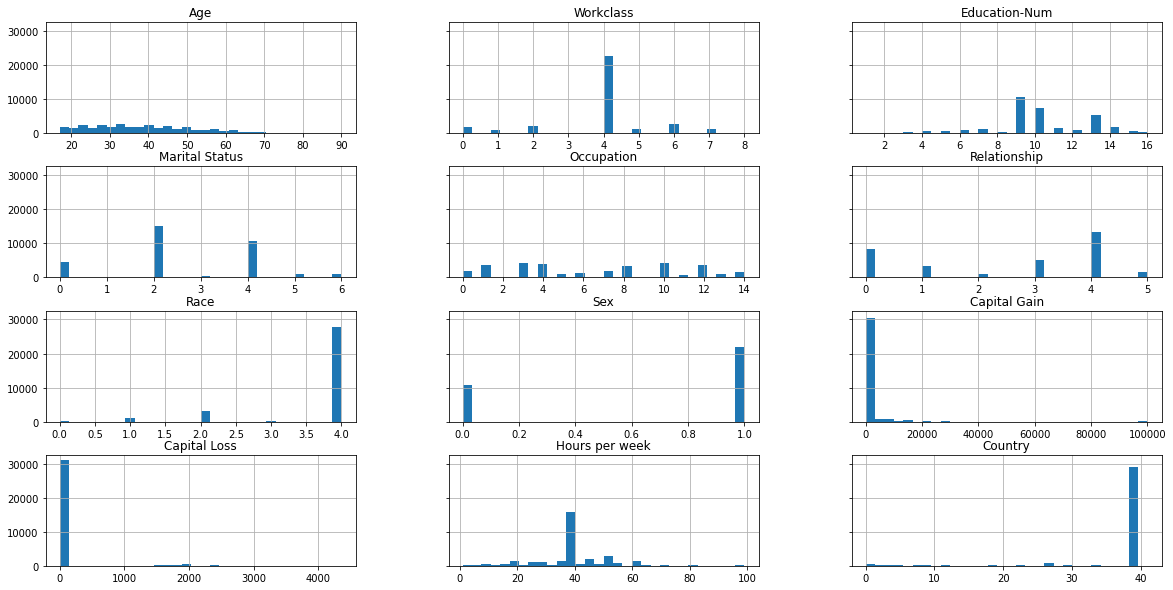

In [ ]:
hist = x.hist(bins = 30, sharey= True, figsize = (20,10))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 1)
x_train_display = x_display.loc[x_train.index]

In [ ]:
x_train_display

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
16465,39.0,Self-emp-not-inc,7.0,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,40.0,United-States
5625,54.0,Self-emp-not-inc,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States
30273,32.0,Private,9.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,1902.0,50.0,United-States
3136,45.0,Self-emp-not-inc,10.0,Never-married,Farming-fishing,Not-in-family,White,Male,0.0,0.0,50.0,United-States
4521,60.0,Private,6.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
32511,25.0,Local-gov,13.0,Never-married,Adm-clerical,Own-child,Black,Female,0.0,0.0,40.0,United-States
5192,32.0,Private,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024.0,0.0,45.0,United-States
12172,27.0,Private,13.0,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,Male,0.0,0.0,40.0,?
235,59.0,State-gov,9.0,Married-civ-spouse,Other-service,Husband,White,Male,0.0,0.0,40.0,United-States


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25, random_state= 1)
x_train_display = x_display.loc[x_train.index]

In [ ]:
x_val_display = x_display.loc[x_val.index]

In [ ]:
import pandas as pd
train = pd.concat([pd.Series(y_train, index = x_train.index, name = 'Income>50k', dtype = int), x_train], axis = 1)
validation = pd.concat([pd.Series(y_val, index = x_val.index, name = 'Income>50k', dtype = int), x_val], axis = 1)
test = pd.concat([pd.Series(y_test, index = x_test.index, name = 'Income>50', dtype = int), x_test], axis = 1)

In [ ]:
train


,Income>50k,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
10911,1,47.0,4,9.0,2,3,4,4,1,0.0,0.0,40.0,39
17852,0,31.0,4,13.0,2,7,4,3,1,0.0,0.0,36.0,26
29165,1,32.0,4,10.0,2,13,5,4,0,0.0,0.0,32.0,39
30287,0,58.0,4,9.0,2,3,4,2,1,0.0,0.0,40.0,39
24019,0,17.0,4,6.0,4,6,3,4,1,0.0,0.0,20.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21168,0,43.0,4,8.0,2,14,4,4,1,0.0,0.0,40.0,39
6452,0,26.0,4,9.0,4,7,0,4,1,0.0,0.0,52.0,39
31352,0,32.0,7,14.0,2,10,4,4,1,0.0,0.0,50.0,39
6575,0,45.0,4,9.0,4,6,0,4,1,0.0,0.0,40.0,39


In [ ]:
validation

,Income>50k,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
16530,0,25.0,4,4.0,2,6,4,4,1,0.0,0.0,40.0,26
26723,0,41.0,6,9.0,2,5,5,4,0,0.0,0.0,40.0,39
3338,0,79.0,0,9.0,6,0,0,2,0,0.0,0.0,30.0,39
19367,1,43.0,2,15.0,2,10,4,4,1,15024.0,0.0,45.0,39
30274,0,51.0,5,9.0,4,12,2,4,1,0.0,0.0,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,0,46.0,7,9.0,2,13,4,4,1,0.0,0.0,40.0,39
5937,1,71.0,4,10.0,6,12,0,4,1,0.0,0.0,35.0,39
11034,0,36.0,4,9.0,5,14,2,4,1,0.0,0.0,60.0,26
2819,0,31.0,4,9.0,4,8,0,4,0,0.0,0.0,40.0,39


In [ ]:
train.to_csv('train.csv', index = False, header= False)
validation.to_csv('validation.csv', index= False, header = False)

In [ ]:
pip install sagemaker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 592 kB 6.7 MB/s 
     |████████████████████████████████| 132 kB 56.2 MB/s 
     |████████████████████████████████| 79 kB 9.3 MB/s 
     |████████████████████████████████| 79 kB 8.3 MB/s 
     |████████████████████████████████| 9.3 MB 33.3 MB/s 
     |████████████████████████████████| 140 kB 49.7 MB/s 
     |████████████████████████████████| 115 kB 60.6 MB/s 
     |████████████████████████████████| 110 kB 70.1 MB/s 
     |████████████████████████████████| 52 kB 1.4 MB/s 
  Created wheel for sagemaker: filename=sagemaker-2.116.0-py2.py3-none-any.whl size=809070 sha256=5e0650f657129631eae351319629852c7afcb225a23efb60b2c99e006e3f63b0
  Stored in directory: /root/.cache/pip/wheels/69/db/16/aa0df031157d9bf5793826b6ca00f4124047c99e04d80c372a
  Created wheel for protobuf3-to-dict: filename=protobuf3_to_dict-0.1.5-py3-none-any.whl size=4030 sha256=cec8d80e2e

In [ ]:
import sagemaker, boto3, os
bucket = sagemaker.Session().default_bucket()

ValueError: ignored